# Projeto Unicórnio

### Projeto educacional de empresas Unicórnio

"Unicórnio" é um termo utilizado nas indústrias de capital de risco para descrver as startups que alcançaram um capital fechado superior a US$ 1 bilhão.

Unicórnios podem se referir também como um fenômeno de recutamento no setor de recursos humanos, onde os gerentes de RH têm grandes expectativas para preencher um cargo e acaba procurando candidatos com qualificações superiores às exigidas para um cargo específico.

O link abaixo é de onde foi encontrado o dataset.

https://www.kaggle.com/code/himanshunayal/unciorn-startups-eda/data

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Ler dados
df = pd.read_csv("Startups2021end.csv")

In [3]:
df.shape

(936, 8)

In [4]:
# Primeiros registros
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
# Colunas
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
# Renomear as colunas
df.rename(columns = {
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor($)',
    'Date Joined' : 'DataAdesao',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores'
}, inplace=True)

In [7]:
# Verificar Tipo da informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            936 non-null    int64 
 1   Empresa       936 non-null    object
 2   Valor($)      936 non-null    object
 3   DataAdesao    936 non-null    object
 4   Pais          936 non-null    object
 5   Cidade        921 non-null    object
 6   Setor         936 non-null    object
 7   Investidores  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [8]:
# Campos nulos
df.isnull().sum()

Id               0
Empresa          0
Valor($)         0
DataAdesao       0
Pais             0
Cidade          15
Setor            0
Investidores     1
dtype: int64

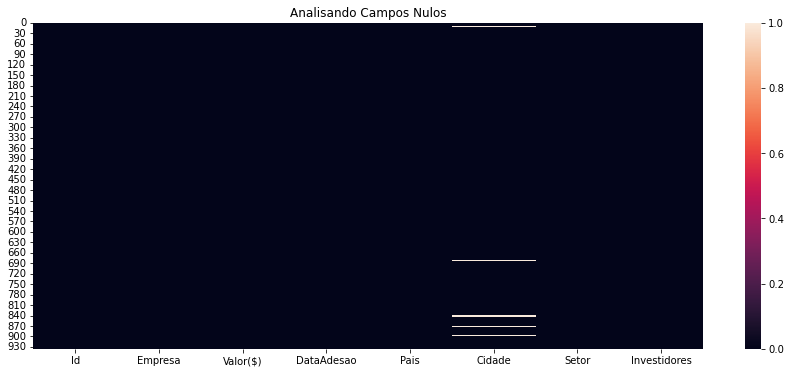

In [9]:
# Gráfica
plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap(df.isnull());

In [10]:
# Campos únicos
df.nunique()

Id              936
Empresa         935
Valor($)        192
DataAdesao      589
Pais             47
Cidade          239
Setor            17
Investidores    920
dtype: int64

In [11]:
# Valores únicos
df['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [12]:
df.loc[df['Setor'] == 'Finttech', 'Setor'] = 'Fintech'
df.loc[df['Setor'] == 'Artificial intelligence', 'Setor'] = 'Artificial Intelligence'

In [13]:
# Valores únicos - Rank
df['Setor'].value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial Intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: Setor, dtype: int64

In [14]:
# Valores únicos - Rank - normalizado
df['Setor'].value_counts(normalize=True)

Fintech                                0.204060
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial Intelligence                0.077991
Health                                 0.067308
Other                                  0.054487
Supply chain, logistics, & delivery    0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Name: Setor, dtype: float64

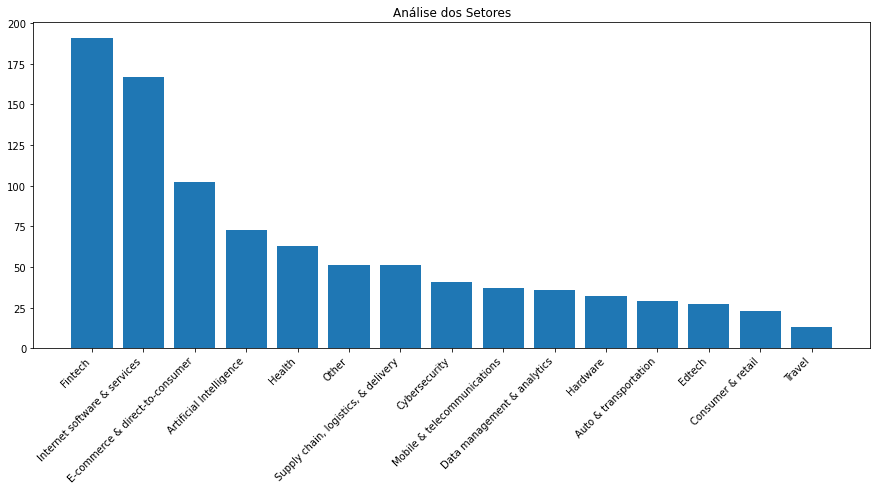

In [15]:
plt.figure( figsize=(15,6) )
plt.title('Análise dos Setores')
plt.bar(df['Setor'].value_counts().index, df['Setor'].value_counts())
plt.xticks( rotation=45, ha='right');

In [16]:
# Quantidade de Startups por país
df['Pais'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [17]:
# Quantidade de Startup por país em porcentagem
Analise = round(df['Pais'].value_counts( normalize=True ) * 100, 2)

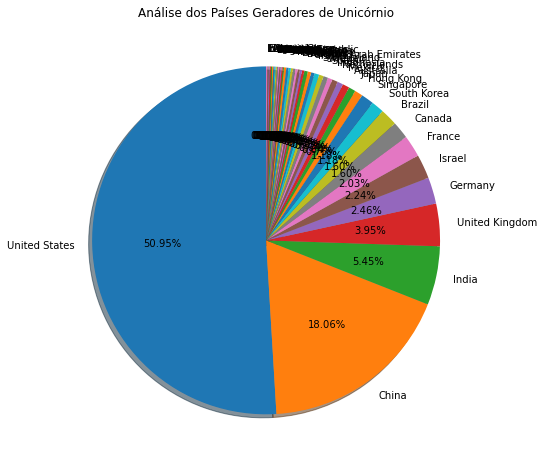

In [18]:
plt.figure( figsize=(20,8))
plt.title('Análise dos Países Geradores de Unicórnio')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.2f%%'
);